In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

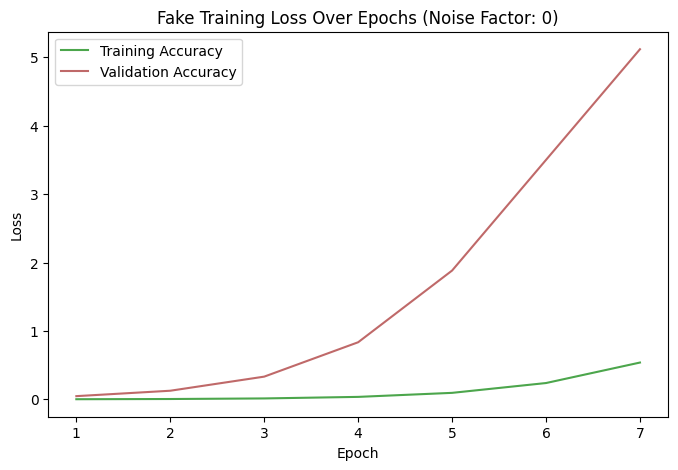

In [194]:
def loss(num_epochs=10, noise_factor=0.0):
    epochs = np.arange(1, num_epochs + 1)
    train_loss = (9 + np.exp(-(epochs - 5))) + np.random.normal(0, noise_factor, num_epochs)
    val_loss = (13+ np.exp(-(epochs - 5))) + np.random.normal(0, noise_factor, num_epochs)

    return epochs, train_loss, val_loss

def accuracy(num_epochs=10, noise_factor=0.0):
    epochs = np.arange(1, num_epochs + 1)
    train_loss = 2 / (1 + np.exp(-(epochs - 8))) + np.random.normal(0, noise_factor, num_epochs)
    val_loss = 7 / (1 + np.exp(-(epochs - 6))) + np.random.normal(0, noise_factor, num_epochs)

    return epochs, train_loss, val_loss

num_epochs = 7
noise_factor = 0
epochs, train_loss, val_loss = loss(num_epochs, noise_factor)
epochs, train_acc, val_acc = accuracy(num_epochs, noise_factor)

data = {
    'Kernels': epochs,
    'Parllel processing': train_acc,
    'Sequential processing': val_acc
}

df = pd.DataFrame(data)


plt.figure(figsize=(8, 5))

plt.plot(epochs, train_acc, label='Training Accuracy', color='green', linestyle='-', marker='', alpha=0.7)
plt.plot(epochs, val_acc, label='Validation Accuracy', color='brown', linestyle='-', marker='', alpha=0.7)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Fake Training Loss Over Epochs (Noise Factor: {noise_factor})')
plt.legend()
plt.show()

In [195]:
df.to_csv('parallelVSwithoutParallel.csv')

In [173]:
df1=pd.read_csv('./resnet18.csv')
df1=df1.drop(df1.columns[0],axis=1)


df2=pd.read_csv('./HybridResnet18.csv')
df2=df2.drop(df2.columns[0],axis=1)



In [174]:
df1.head()

,Epochs,Training Loss,Validation Loss,Training Accuracy,Validation Accuracy
0,1,62.875666,67.842445,0.008999,1.648974
1,2,28.027159,30.735563,1.301162,-2.057922
2,3,15.929682,19.431479,-0.006910,0.089234
3,4,9.545309,12.856225,-1.755446,-0.461394
4,5,8.770743,13.718616,1.005674,0.109572


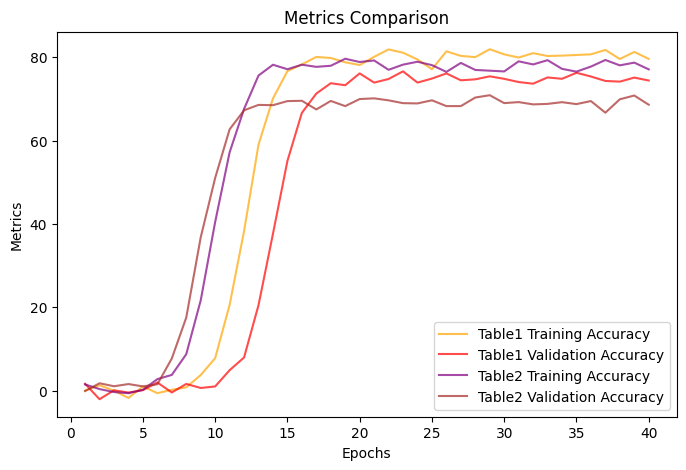

In [175]:
plt.figure(figsize=(8, 5))


plt.plot(df1['Epochs'], df1['Training Accuracy'], label='Table1 Training Accuracy', color='orange', linestyle='-', marker='', alpha=0.7)
plt.plot(df1['Epochs'], df1['Validation Accuracy'], label='Table1 Validation Accuracy', color='red', linestyle='-', marker='', alpha=0.7)


plt.plot(df2['Epochs'], df2['Training Accuracy'], label='Table2 Training Accuracy', color='purple', linestyle='-', marker='', alpha=0.7)
plt.plot(df2['Epochs'], df2['Validation Accuracy'], label='Table2 Validation Accuracy', color='brown', linestyle='-', marker='', alpha=0.7)

plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Metrics Comparison')
plt.legend()

plt.show()